<a href="https://colab.research.google.com/github/Bhagyasrisatya7/Movie-Recommender-System-/blob/main/Movies_Recommend_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving movies_metadata.csv to movies_metadata (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ratings_small.csv to ratings_small (1).csv


In [ ]:
movies = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings_small.csv')

In [ ]:
print("Movies Dataset Info:")
print(movies.info())

Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-

In [ ]:
print("\nRatings Dataset Info:")
print(ratings.info())


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [ ]:
print("\nMissing Values in Movies Dataset:")
print(movies.isnull().sum())


Missing Values in Movies Dataset:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [ ]:
print("\nMissing Values in Ratings Dataset:")
print(ratings.isnull().sum())


Missing Values in Ratings Dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
print("\nMovies Dataset Preview:")
print(movies.head())


Movies Dataset Preview:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN  

In [ ]:
print("\nRatings Dataset Preview:")
print(ratings.head())


Ratings Dataset Preview:
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

In [ ]:
print("\nRatings Dataset Statistics:")
print(ratings['rating'].describe())


Ratings Dataset Statistics:
count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


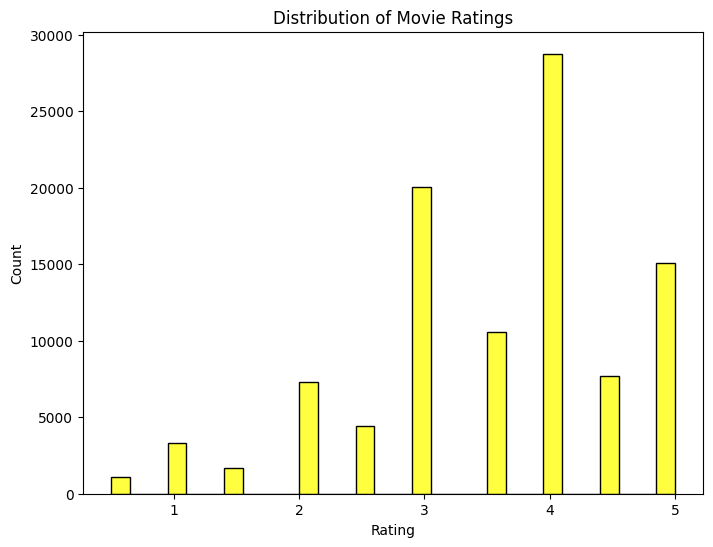

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=30, kde=False, color='yellow')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

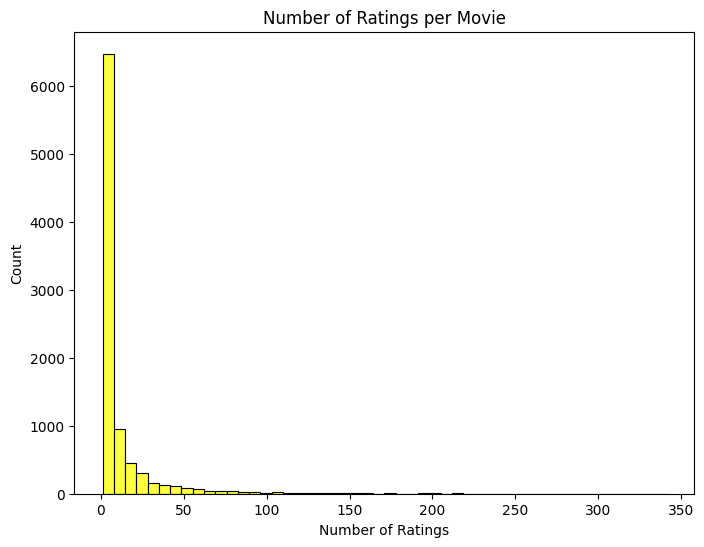

In [ ]:
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='yellow')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

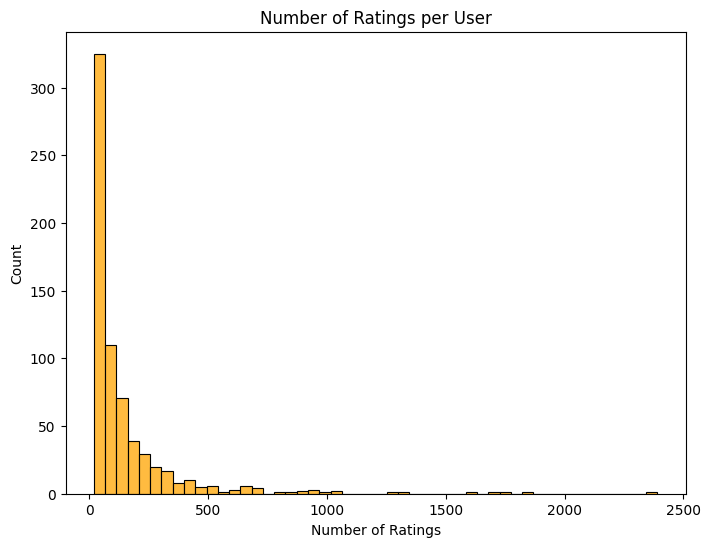

In [ ]:
ratings_per_user = ratings.groupby('userId').size()
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='orange')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

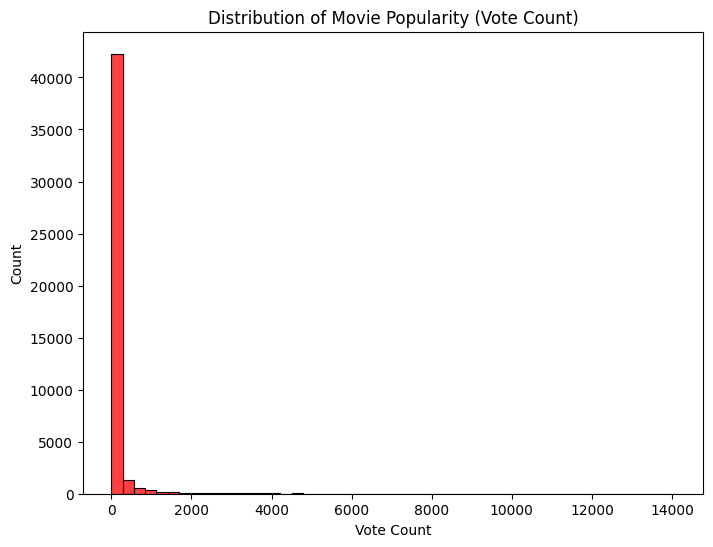

In [ ]:
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.histplot(movies['vote_count'].dropna(), bins=50, kde=False, color='red')
plt.title('Distribution of Movie Popularity (Vote Count)')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505167 sha256=ac6d98d3592b7e2829fe59435babf3653ae22daf947daecbab60aa81ec0c0c0f
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load the ratings dataset into Surprise's format
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
svd = SVD()

# Evaluate the model using cross-validation
print("\nCross-Validation Results:")
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Cross-Validation Results:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8942  0.8946  0.8943  0.8958  0.9018  0.8962  0.0029  
MAE (testset)     0.6898  0.6876  0.6890  0.6892  0.6944  0.6900  0.0023  
Fit time          1.59    2.70    2.52    1.57    1.57    1.99    0.51    
Test time         0.12    0.11    0.26    0.12    0.23    0.17    0.07    


{'test_rmse': array([0.89420321, 0.89459953, 0.89434847, 0.89578459, 0.90182156]),
 'test_mae': array([0.68982268, 0.68764913, 0.6889683 , 0.68923709, 0.69436281]),
 'fit_time': (1.5904841423034668,
  2.695606231689453,
  2.515707015991211,
  1.5687916278839111,
  1.5691964626312256),
 'test_time': (0.1160435676574707,
  0.1069185733795166,
  0.2638585567474365,
  0.11686420440673828,
  0.23031830787658691)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:

user_id = 1
movie_id = 10  # Replace with a valid movie ID from your dataset
prediction = svd.predict(user_id, movie_id)
print(f"\nPredicted rating for user {user_id} and movie {movie_id}: {prediction.est}")


Predicted rating for user 1 and movie 10: 2.5926260967236137


In [ ]:
def recommend_movies(user_id, num_recommendations=10):
    """
    Recommends the top N movies for a given user based on predicted ratings.

    Parameters:
    - user_id: The ID of the user to recommend movies for.
    - num_recommendations: Number of movies to recommend.

    Returns:
    - DataFrame with top recommended movies and their predicted ratings.
    """
    # List all unique movie IDs
    movie_ids = movies['id'].dropna().unique()

    # Predict ratings for all movies the user hasn't rated yet
    movie_ratings = []
    for movie_id in movie_ids:
        try:
            prediction = svd.predict(user_id, int(movie_id))
            movie_ratings.append((movie_id, prediction.est))
        except ValueError:
            continue

    # Sort movies by predicted rating in descending order
    sorted_ratings = sorted(movie_ratings, key=lambda x: x[1], reverse=True)[:num_recommendations]

    # Get movie titles for the recommended IDs
    recommended_movies = pd.DataFrame(sorted_ratings, columns=['movieId', 'predicted_rating'])
    recommended_movies = recommended_movies.merge(movies, left_on='movieId', right_on='id', how='left')

    return recommended_movies[['title', 'predicted_rating']]

In [ ]:
user_id=int(input())
top_recommendations = recommend_movies(user_id, num_recommendations=10)
print("\nTop 10 Recommended Movies:")
print(top_recommendations)

10

Top 10 Recommended Movies:
                      title  predicted_rating
0      Sleepless in Seattle          4.594937
1   While You Were Sleeping          4.538354
2          Bonnie and Clyde          4.524048
3        Once Were Warriors          4.512739
4           Broken Blossoms          4.506576
5             Lonely Hearts          4.487654
6            The Good Thief          4.473470
7  The Million Dollar Hotel          4.448557
8            License to Wed          4.436276
9               Hard Target          4.415794
